# <span style="color: darkblue; font-size: 6"> QTM 151 Final Project  </span>

<font size = "5">

<font size = "1">

# <span style="color:black"> Group 24 – Charles Cook, Chris Belz, Sean Baik   </span>

## <span style="color: darkblue; font-size: 6"> Introduction  </span>

<font size = "2">

Formula 1 is a global auto racing sport featuring 10 teams with 2 drivers per team (20 drivers total) competing over a season of about 20 to 23 races on various tracks worldwide. The format consists of practice sessions, a qualifying round, and a final race, where points are awarded to the top 10 finishers, ranging from 25 points for first place to 1 point for tenth. These points tally towards the Drivers' and Constructors' Championships, reflecting individual and team successes. 

As races span across various different circuits, countries, and conditions, performances can vary, with certain drivers/teams experiencing greater success for certain tracks. From this, we arrived at the following research question(s): 

<ul>
  <li><span style="font-size: 2; font-weight: bold">How do different characteristics of circuits (e.g. altitude, number of turns, average speed) influence race outcomes</span></li>
  <li><span style="font-size: 2; font-weight: bold">Are certain teams better suited to certain types of circuits?</span></li>
</ul>

<font size = "2">

The research question was designed to examine if certain teams performed better in certain track characteristics (i.e. do certain teams perform better in circuits with higher altitude / more turns / greater average speed?). Method wise, points would be the metric to determine performance (the higher, the better performance), and our research will be limited to races from 2013 onwards so as to be able to adequately work with a reasonable amount of data.

## <span style="color: darkblue; font-size: 4">Import Libraries & Packages</span>

<font size = "2">
We imported the following libraries: pandas, matplotlib.pyplot. The pandas library is used for processing datasets; numpy is used for numerical related operations; matplotlib.pyplot is used for creating graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <span style="color: darkblue; font-size: 4"> Datasets & Description</span>

<font size = "2">
From the available datasets, we used the following: circuits, constructors, results, races, and a self-created dataset consisting of data the circuits' characteristics (length and number of turns)*. 

# </span>

<font size = "0.5"> *Information retrieved from: https://en.wikipedia.org/wiki/List_of_Formula_One_circuits

### <span style="color: darkblue; font-size: 3"> Circuits</span>

<font size = "2">
The circuits dataset contains the list of all circuits where Formula 1 has raced since 1950. 'circuitId' corresponds to a unique circuit, and the circuit_Ref, name, location, country, latitude, and longitude provide more information on the circuit in the global context. The 77 rows denotes a total of 77 unique circuits. The altitude data of this dataset is also a critical element in our research question.

# </span>

### <span style="color: darkblue; font-size: 3"> Constructors</span>

<font size = "2">
The constructors dataset contains a list of all constructors (teams) that have competed in the Formula 1 competition since 1950. The 211 observations denote the number of unique constructors to have competed, also reflected through the 'constructorId' figure. Other elements provide information on the name and national origin of the constructor.

# </span>

### <span style="color: darkblue; font-size: 3"> Results</span>

<font size = "2">
The results dataset contains the individual results from races and the its constructors and drivers since 1950. The number of observations (25840), theoretically, contains every result for every race of every constructor and driver. It contains detailed information on the points scored, fastestLapSpeed (which is critical to our research question), and other elements of the individial result. As it consists of many 'Id' categories (resultsId, raceId, driverId, constructorId), it will be compatible to merge with most other datasets.

# </span>

### <span style="color: darkblue; font-size: 3"> Races</span>

<font size = "2">
The races dataset contains the information of every race since 1950; 1102 races, with each raceId corresponding to a unique race. It also contains other information on the race, such as the exact date and time, circuit, and more recently, qualifying and sprint informations. The year element of this dataset provides great use in our research, as it allows us to confine and focus our research to our defined scope of data.

# </span>

### <span style="color: darkblue; font-size: 3"> Features</span>

<font size = "2">
This self-created dataset contains the total length and number of turns of every circuit within our defined research frame (circuits raced from 2013 onwards). The number of observations (34) denote the total number of circuits we will work with in our research. This dataset also allows for more convenient merging without having to further filter and subset other information.

In [2]:
circuits = pd.read_csv("data_raw/circuits.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
results = pd.read_csv("data_raw/results.csv")
races = pd.read_csv("data_raw/races.csv")
features = pd.read_csv("data_raw/circuits_details.csv")

### <span style="color: darkblue; font-size: 3"> Merging</span>

<font size = "2">
We first used the dictionary function to change the term 'name' across multiple datasets to more a specific classification. This would also the reassignment of 'name' variables when mergning. 

# </span>

We then merged circuits with races, selecting necessary variables such as the circuit Id, name, location, country, and altitude. We likewise omitted the unecesary variables from races to make the dataset less messy. We merged on circuitId. Subsequent merges selected the necessary variables, and merged on common variables.

In [3]:

replace_name_races = {"name":"grand_prix"}
races = races.rename(columns = replace_name_races)

replace_name_circuits = {"name":"circuit_name"}
circuits = circuits.rename(columns = replace_name_circuits)

replace_name_features = {"name":"circuit_name"}
features = features.rename(columns = replace_name_features)

replace_name_constructors = {"name":"team_name"}
constructors = constructors.rename(columns = replace_name_constructors)



# Merge circuits with races on circuitId, omitting unnecessary variables such as lat, lng, url
circuits_merged_1 = pd.merge(circuits[['circuitId', 'circuit_name', 'location', 'country', 'alt']],
                             races[['raceId', 'year', 'circuitId', 'grand_prix']],
                             on = 'circuitId',
                             how = 'left')


# Subset all races and circuits observations to 2013 onwards in line with our specified research range
circuits_merged_1 = circuits_merged_1.query("year >= 2013")


# Merge datasets with dataset including features of circuits within specified time frame
circuits_merged_2 = pd.merge(circuits_merged_1[['circuitId', 'circuit_name', 'grand_prix', 'location', 'country', 'raceId', 'year', 'alt']],
                             features[['circuit_name', 'length', 'turns']],
                             on = 'circuit_name',
                             how = 'left').sort_values("circuit_name", ascending=True)


# Merge fastestLapTime and fastestLapSpeed onto primary datasset
# Finalize aggregation of three elements of research question (circuit speed, turns, altitude) into one dataset
circuits_merged_3 = pd.merge(circuits_merged_2,
                             results[['raceId', 'constructorId', 'points', 'fastestLapTime', 'fastestLapSpeed']],
                             on = 'raceId',
                             how = 'left')


master_data = pd.merge(circuits_merged_3,
                       constructors[['constructorId', 'team_name', 'nationality']],
                       on = 'constructorId',
                       how = 'left')

# Convert fastestLapSpeed to numeric to be able to execute numpy statistics operations
master_data['fastestLapSpeed'] = pd.to_numeric(master_data['fastestLapSpeed'], errors='coerce')
master_data['alt'] = pd.to_numeric(master_data['alt'], errors='coerce')

# Create new variable in dataset "average_speed" by computing mean of fastestLapSpeeds for each circuit
master_data['average_speed'] = master_data.groupby('circuitId')['fastestLapSpeed'].transform('mean')


In [4]:
# Create separate, working datasets for each metric
# Grouped by circuitId, and contains the circuit and grand prix names, as well as the metric value for each circuit

circuits_alt = (master_data.groupby('circuitId')
                           .agg(circuit_name =('circuit_name', 'first'), 
                                grand_prix =('grand_prix', 'first'), 
                                alt = ('alt', 'first'))
                           .sort_values(by = 'alt', ascending=True))
display(circuits_alt)

circuits_turns = (master_data.groupby('circuitId')
                             .agg(circuit_name=('circuit_name', 'first'),
                                  grand_prix=('grand_prix', 'first'), 
                                  turns = ('turns', 'first'))
                             .sort_values(by = 'turns', ascending=True))
display(circuits_turns)

circuits_speed = (master_data.groupby('circuitId')
                             .agg(circuit_name=('circuit_name', 'first'), 
                                  grand_prix=('grand_prix', 'first'), 
                                  average_speed = ('average_speed', 'first'))
                             .sort_values(by = 'average_speed', ascending=True))
display(circuits_speed)


,circuit_name,grand_prix,alt
circuitId,,,
73,Baku City Circuit,European Grand Prix,-7.0
35,Korean International Circuit,Korean Grand Prix,0.0
71,Sochi Autodrom,Russian Grand Prix,2.0
24,Yas Marina Circuit,Abu Dhabi Grand Prix,3.0
17,Shanghai International Circuit,Chinese Grand Prix,5.0
39,Circuit Park Zandvoort,Dutch Grand Prix,6.0
3,Bahrain International Circuit,Bahrain Grand Prix,7.0
6,Circuit de Monaco,Monaco Grand Prix,7.0
1,Albert Park Grand Prix Circuit,Australian Grand Prix,10.0


,circuit_name,grand_prix,turns
circuitId,,,
70,Red Bull Ring,Styrian Grand Prix,10
14,Autodromo Nazionale di Monza,Italian Grand Prix,11
7,Circuit Gilles Villeneuve,Canadian Grand Prix,13
4,Circuit de Barcelona-Catalunya,Spanish Grand Prix,14
5,Istanbul Park,Turkish Grand Prix,14
76,Autodromo Internazionale del Mugello,Tuscan Grand Prix,14
11,Hungaroring,Hungarian Grand Prix,14
39,Circuit Park Zandvoort,Dutch Grand Prix,14
75,Autódromo Internacional do Algarve,Portuguese Grand Prix,15


,circuit_name,grand_prix,average_speed
circuitId,,,
6,Circuit de Monaco,Monaco Grand Prix,153.099880
15,Marina Bay Street Circuit,Singapore Grand Prix,165.802025
11,Hungaroring,Hungarian Grand Prix,187.836591
32,Autódromo Hermanos Rodríguez,Mexico City Grand Prix,189.674145
69,Circuit of the Americas,United States Grand Prix,195.027868
35,Korean International Circuit,Korean Grand Prix,195.413773
4,Circuit de Barcelona-Catalunya,Spanish Grand Prix,195.714422
17,Shanghai International Circuit,Chinese Grand Prix,195.718319
24,Yas Marina Circuit,Abu Dhabi Grand Prix,195.985340


/Users/sean/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sean/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Average Speed (km/h)')

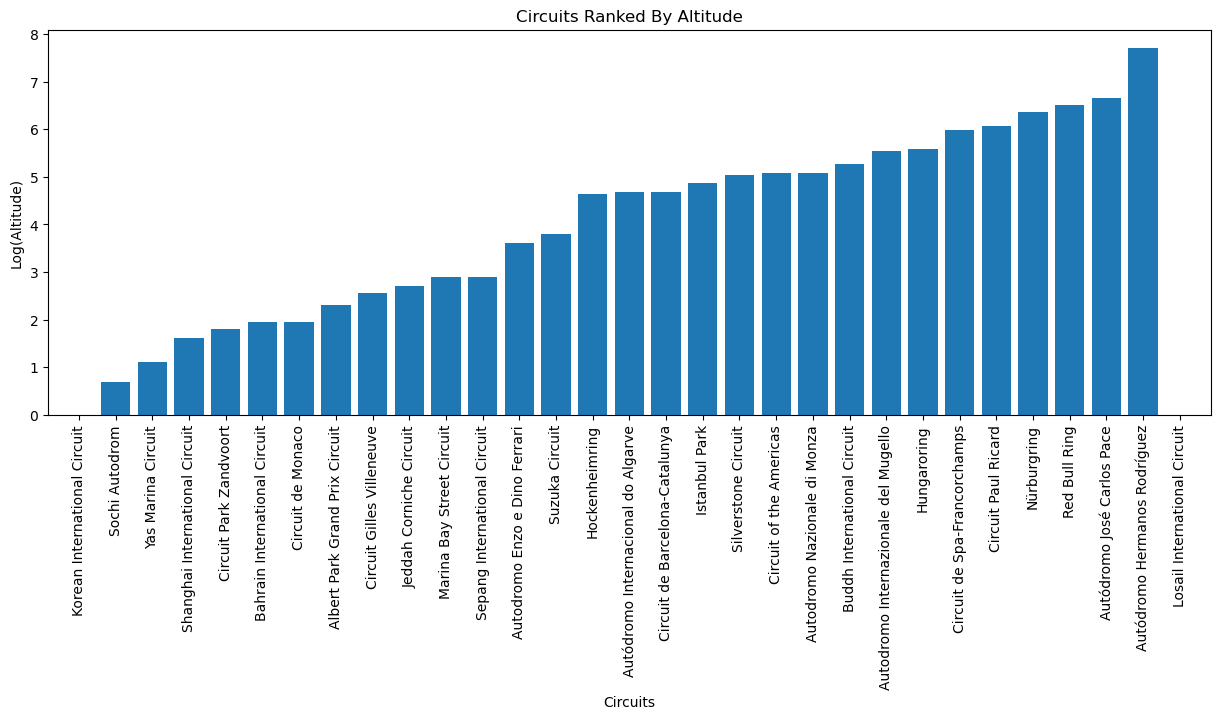

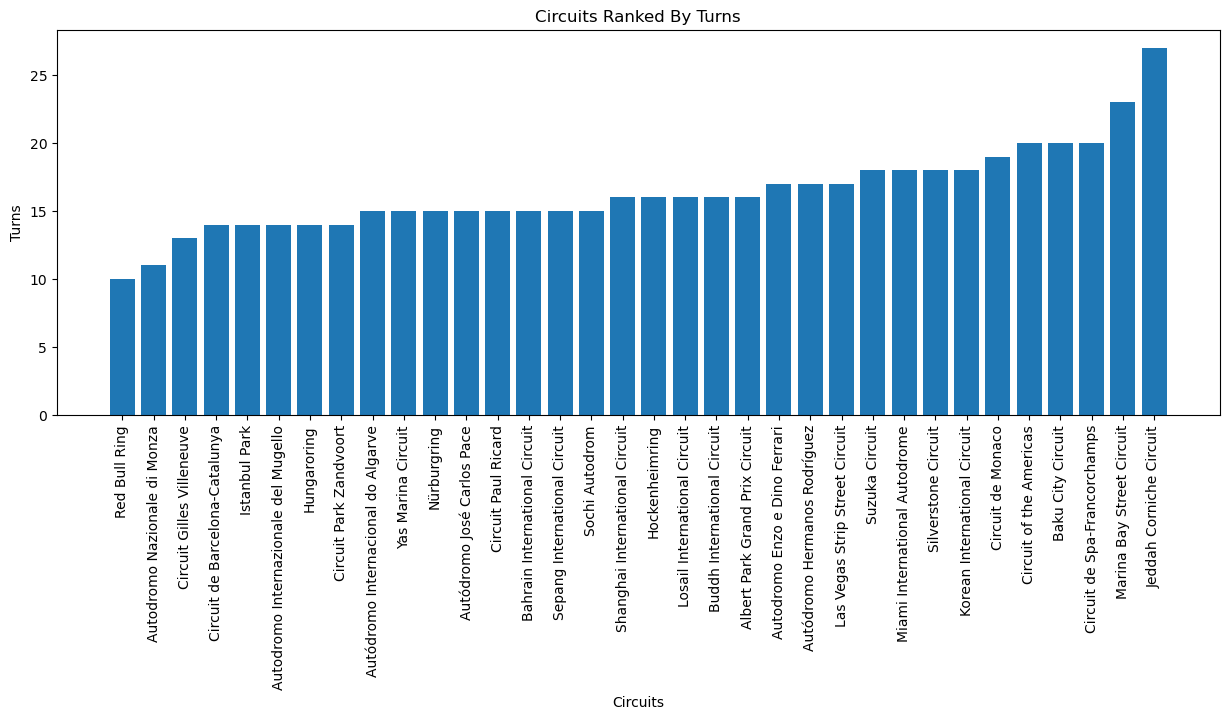

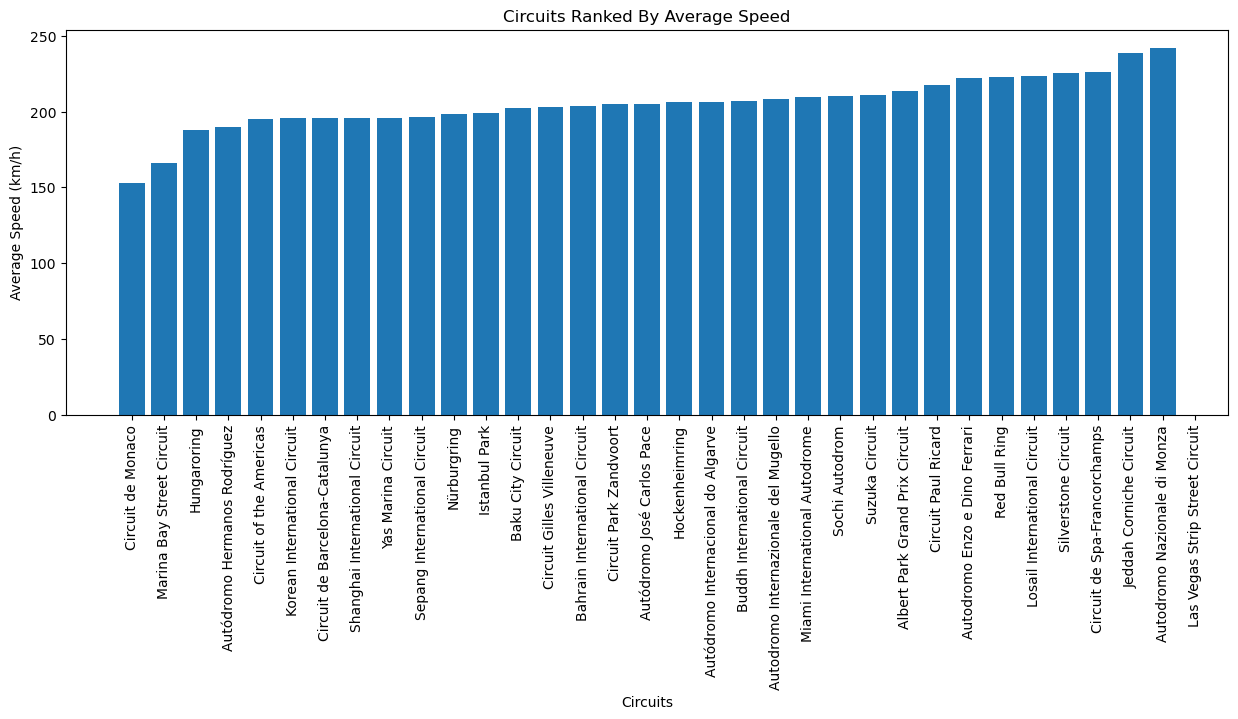

In [5]:
# Create bar charts, displaying the order of the circuits by metric
# From this, we can see the circuits with the highest/lowest altitude, most/least turns, highest/lowest average speed
# We took the log of altitude as the difference between the circuit with the highest altitude was too stark from the rest


circuits_alt['log_values']= np.log(circuits_alt['alt'])
plt.figure(figsize=(15, 5))
plt.bar(circuits_alt['circuit_name'], circuits_alt['log_values'])
plt.title('Circuits Ranked By Altitude')
plt.xlabel('Circuits')
plt.xticks(rotation=90)
plt.ylabel('Log(Altitude)')


plt.figure(figsize=(15, 5))
plt.bar(circuits_turns['circuit_name'], circuits_turns['turns'])
plt.title('Circuits Ranked By Turns')
plt.xlabel('Circuits')
plt.xticks(rotation=90)
plt.ylabel('Turns')


plt.figure(figsize=(15, 5))
plt.bar(circuits_speed['circuit_name'], circuits_speed['average_speed'])
plt.title('Circuits Ranked By Average Speed')
plt.xlabel('Circuits')
plt.xticks(rotation=90)
plt.ylabel('Average Speed (km/h)')

In [ ]:
# finding the best performing constructor for each circuit

(master_data.groupby(['constructorId', 'circuit_name'])
            .agg(mean_points = ('points'))
 

In [9]:
# Create the initial figure_1 DataFrame
figure_1 = (master_data.groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index()
                       .groupby('constructorId')
                       .apply(lambda x: x.nlargest(5, 'mean_points'))
                       .reset_index(drop=True))

# Blank out repeated constructorIds for visual clarity
figure_1['constructorId'] = figure_1['constructorId'].where(figure_1['constructorId'] 
                                                            != figure_1['constructorId'].shift(), "")

figure_1['constructorId'] = pd.to_numeric(figure_1['constructorId'])

# Merge to add team_name based on constructorId
figure_1 = pd.merge(figure_1,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

# Merge to add turns based on circuit_name
figure_1 = pd.merge(figure_1,
                    master_data[['circuit_name', 'alt']].drop_duplicates(),
                    on = 'circuit_name',
                    how = 'left')

# Rearrange columns to place 'team_name' next to 'constructorId'
figure_1 = figure_1[['constructorId', 'team_name', 'circuit_name', 'mean_points', 'alt']]
figure_1['alt_log']= np.log(figure_1['alt'])

# Replace NaNs with blank strings in 'constructorId' and 'team_name'
figure_1['constructorId'].fillna('', inplace=True)
figure_1['team_name'].fillna('', inplace=True)

figure_1

/Users/sean/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sean/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,constructorId,team_name,circuit_name,mean_points,alt,alt_log
0,1.0,McLaren,Autodromo Enzo e Dino Ferrari,8.00,37.0,3.610918
1,,,Nürburgring,5.50,578.0,6.359574
2,,,Istanbul Park,5.25,130.0,4.867534
3,,,Autódromo Internacional do Algarve,5.00,108.0,4.682131
4,,,Buddh International Circuit,5.00,194.0,5.267858
...,...,...,...,...,...,...
90,214.0,Alpine F1 Team,Losail International Circuit,12.50,NaN,NaN
91,,,Hungaroring,10.75,264.0,5.575949
92,,,Suzuka Circuit,9.00,45.0,3.806662
93,,,Autódromo Internacional do Algarve,5.00,108.0,4.682131


In [7]:
# Create the initial figure_1 DataFrame
figure_2 = (master_data.groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index()
                       .groupby('constructorId')
                       .apply(lambda x: x.nlargest(5, 'mean_points'))
                       .reset_index(drop=True))

# Blank out repeated constructorIds for visual clarity
figure_2['constructorId'] = figure_2['constructorId'].where(figure_2['constructorId'] 
                                                            != figure_2['constructorId'].shift(), "")

figure_2['constructorId'] = pd.to_numeric(figure_2['constructorId'])

# Merge to add team_name based on constructorId
figure_2 = pd.merge(figure_2,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

# Merge to add turns based on circuit_name
figure_2 = pd.merge(figure_2,
                    master_data[['circuit_name', 'turns']].drop_duplicates(),
                    on = 'circuit_name',
                    how = 'left')

# Rearrange columns to place 'team_name' next to 'constructorId'
figure_2 = figure_2[['constructorId', 'team_name', 'circuit_name', 'mean_points', 'turns']]

# Replace NaNs with blank strings in 'constructorId' and 'team_name'
figure_2['constructorId'].fillna('', inplace=True)
figure_2['team_name'].fillna('', inplace=True)

figure_2

,constructorId,team_name,circuit_name,mean_points,turns
0,1.0,McLaren,Autodromo Enzo e Dino Ferrari,8.00,17
1,,,Nürburgring,5.50,15
2,,,Istanbul Park,5.25,14
3,,,Autódromo Internacional do Algarve,5.00,15
4,,,Buddh International Circuit,5.00,16
...,...,...,...,...,...
90,214.0,Alpine F1 Team,Losail International Circuit,12.50,16
91,,,Hungaroring,10.75,14
92,,,Suzuka Circuit,9.00,18
93,,,Autódromo Internacional do Algarve,5.00,15


In [8]:
figure_3 = (master_data.groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index()
                       .groupby('constructorId')
                       .apply(lambda x: x.nlargest(5, 'mean_points'))
                       .reset_index(drop=True))

# Blank out repeated constructorIds for visual clarity
figure_3['constructorId'] = figure_3['constructorId'].where(figure_3['constructorId'] 
                                                            != figure_3['constructorId'].shift(), "")

figure_3['constructorId'] = pd.to_numeric(figure_3['constructorId'])

# Merge to add team_name based on constructorId
figure_3 = pd.merge(figure_3,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

# Merge to add turns based on circuit_name
figure_3 = pd.merge(figure_3,
                    master_data[['circuit_name', 'average_speed']].drop_duplicates(),
                    on = 'circuit_name',
                    how = 'left')

# Rearrange columns to place 'team_name' next to 'constructorId'
figure_3 = figure_3[['constructorId', 'team_name', 'circuit_name', 'mean_points', 'average_speed']]

# Replace NaNs with blank strings in 'constructorId' and 'team_name'
figure_3['constructorId'].fillna('', inplace=True)
figure_3['team_name'].fillna('', inplace=True)

figure_3

,constructorId,team_name,circuit_name,mean_points,average_speed
0,1.0,McLaren,Autodromo Enzo e Dino Ferrari,8.00,221.776810
1,,,Nürburgring,5.50,198.390214
2,,,Istanbul Park,5.25,198.905300
3,,,Autódromo Internacional do Algarve,5.00,206.243308
4,,,Buddh International Circuit,5.00,207.032238
...,...,...,...,...,...
90,214.0,Alpine F1 Team,Losail International Circuit,12.50,223.531400
91,,,Hungaroring,10.75,187.836591
92,,,Suzuka Circuit,9.00,210.767525
93,,,Autódromo Internacional do Algarve,5.00,206.243308
